In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib.dates as mdates

from datetime import datetime
import datetime
from datetime import timedelta

import random

from mlxtend.plotting import ecdf
import powerlaw

from sklearn import metrics
import itertools


!pip install --upgrade pip
!pip install mlxtend

!pip install powerlaw

In [9]:
def setSeabornStyle(style='Default'):
    if (style == 'Dark'):
        #sns.set(style="ticks", palette='dark')
        sns.set(style="ticks")
        sns.set_palette(sns.xkcd_palette(["windows blue"])+sns.color_palette('Set2', 4)+sns.xkcd_palette(["amber", "greyish", "faded green", "dusty purple"]))
    else:
        #sns.set(style="ticks", palette='Pastel1')
        sns.set(style="ticks")
        sns.set_palette(sns.color_palette(["#A576B6", "#58A7DC"])+sns.color_palette('Set2', 8))

In [10]:
def fitDistribution(x1, x_min=None):
    if (x_min != None):
        fit = powerlaw.Fit(np.array(x1), discrete=True, xmin=x_min)
    else:
        fit = powerlaw.Fit(np.array(x1), discrete=True)
    fit.power_law.alpha
    fit.power_law.sigma

    #para ver as distribuições possíveis
    #fit.supported_distributions
    distributions = ['exponential','lognormal','lognormal_positive','stretched_exponential','truncated_power_law']


    for dist in distributions:
        t = fit.distribution_compare('power_law', dist, normalized_ratio=True)
        print("({2}, {0:12.12f}, {1:12.12f})".format(t[0], t[1], dist))
        
    return fit;

In [11]:
#import sys
#print(sys.version)

pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:20,.2f}'.format

np.set_printoptions(suppress=True)



contrastColorPallete = ['#998ec3', '#f1a340', '#f7f7f7']
paleta = sns.color_palette("Pastel1", 20)
setSeabornStyle()

size_p = 4
size_g = 8
size_xg = 12
size_xxg = 16

line_size=0.4

pd.set_option('display.max_columns', 500)

connection_string = "host=150.164.7.144 dbname=strava user=strava_usr password=123456"

### Leitura do banco

In [12]:

import pyodbc
import json

with open('sql_credentials.json') as f:
    data = json.load(f)
    username = data['userName']
    password = data['userPassword']
    server = data['server']
    database = "db_strava"


driver= '{ODBC Driver 13 for SQL Server}'
conn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
    


In [13]:
query = """
select (select count(*)
        from community_membership c where c.community = ac.community and c.algorithm = ac.algorithm
        group by community, algorithm) as size,
       algorithm, community
from answer_community ac
"""


Text(0.5, 1.0, 'distribuição das respostas por comunidade')

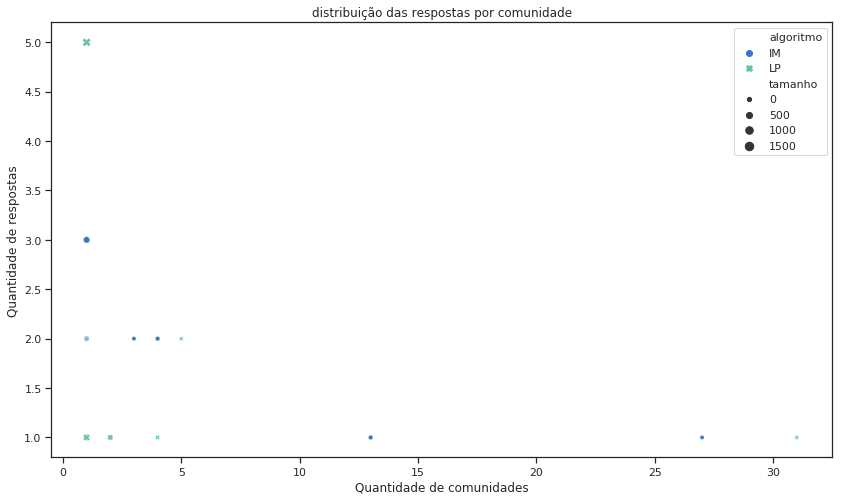

In [19]:
setSeabornStyle('Dark')
plt.figure(figsize=(14,8))
plt.subplots_adjust(hspace=0.4)
plt.subplots_adjust(wspace=0.4)

#plt.subplot(1,1,1)

df = pd.read_sql(query, conn)

df['answers'] = 0
df['size'] = (df['size']/100).astype(int)
df['size'] = (df['size'] * 100).astype(int)
df = df.groupby(['community','size', 'algorithm'], as_index = False).count()
#arredonda por centenas
#t['size'] = t['size']/100
df = df.groupby(['answers','size', 'algorithm'], as_index = False).count()
df.rename(inplace=True, columns={"size": "tamanho"})
df.rename(inplace=True, columns={"answers": "respostas"})
df.rename(inplace=True, columns={"community": "comunidades"})
df.rename(inplace=True, columns={"algorithm": "algoritmo"})


g = sns.scatterplot(x="comunidades", y="respostas", hue="algoritmo", style="algoritmo", size='tamanho', data=df, linewidth=line_size)
#g.set(yscale='log')
#g.set(xscale='log')
g.set_ylabel('Quantidade de respostas')
g.set_xlabel('Quantidade de comunidades')


plt.title('distribuição das respostas por comunidade')

#t = None

### Comunidades com pelo menos 3 respostas

In [20]:
df[df['respostas'] > 2].groupby(['algoritmo', 'respostas'], as_index = False).count().rename(inplace=False, columns={"tamanho": "quantidade"})


,algoritmo,respostas,quantidade,comunidades
0,IM,3,3,3
1,IM,5,1,1
2,LP,3,2,2
3,LP,5,2,2


In [25]:
df = pd.read_sql(query, conn)
df['qtd'] = 0
df = df.groupby(['size', 'algorithm', 'community'], as_index = False).count()
df[df['qtd'] > 2]

,size,algorithm,community,qtd
18,17,LP,35,3
78,157,IM,123,5
90,196,LP,34,5
97,341,IM,23,3
98,396,LP,728,3
102,588,IM,5,3
104,653,IM,3,3
106,1467,LP,242,5
